In [3]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [47]:
one_hot_df = pd.read_csv('Data/allData/PrisonAdmissionsCleanOneHotEncoding.csv')
one_hot_df.drop(columns=['STATE', 'RACE', 'OFFDETAIL', 'OFFGENERAL'], inplace=True)

In [5]:
one_hot_df.head()

,SEX,EDUCATION,ADMITYR,SENTLGTH,AGEADMIT,AK,AL,AR,AZ,CA,...,larceny,motor vehicle theft,murder,negligent manslaugher,other property,other violent,public order,rape/SA,robbery,unspecified
0,1.0,2.0,1991.0,2.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1991.0,0.0,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.0,2.0,1991.0,3.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1.0,1991.0,3.0,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.0,2.0,1991.0,2.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# https://www.mdpi.com/2078-2489/14/3/161
# based on the above paper, we will compare the results of the following models:
# 1. Random Forest
# 2. Decision Tree
# 3. Logistic Regression
# 4. Gradient Boosting
# 5. Deep Learning/MLP

model_metrics = {'randomForest': 0, 'decisionTree': 0, 'logisticClassifier': 0, 'gradientBoosting': 0, 'mlp': 0}

In [115]:
# "independent" variables
feature_cols = list(one_hot_df.columns.values)
feature_cols.remove('SENTLGTH')

# get a random sample of 100000 rows
one_hot_df = one_hot_df.sample(n=10000, random_state=1)

X = one_hot_df[feature_cols] # Features
y = one_hot_df['SENTLGTH'] # Target variable

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [181]:
# Random Forest Classifier

# parameters tuned based on individual model exploration
rf = RandomForestClassifier(max_depth=15, max_leaf_nodes=120, n_estimators=90, max_features=50, random_state=1)
history = rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

# compare training and test accuracy
print("Training Accuracy: " + str(rf.score(X_train, y_train)))
print("Test Accuracy: " + str(rf.score(X_test, y_test)))

mae = str(np.mean(abs(rf_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['randomForest'] = mae

Training Accuracy: 0.5147142857142857
Test Accuracy: 0.468
Mean Absolute Error: 0.8443333333333334


In [196]:
# Decision Tree Model 
dt = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=60, max_features=50, random_state=1)
dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)

# compare training and test accuracy
print("Training Accuracy: " + str(dt.score(X_train, y_train)))
print("Test Accuracy: " + str(dt.score(X_test, y_test)))

mae = str(np.mean(abs(dt_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['decisionTree'] = mae

Training Accuracy: 0.46014285714285713
Test Accuracy: 0.464
Mean Absolute Error: 0.8516666666666667


In [204]:
# Logistic Classification Model 
logreg = LogisticRegression(max_iter=10000, random_state=1)
logreg.fit(X_train, y_train)

lr_y_pred = logreg.predict(X_test)
print("Training Accuracy: " + str(logreg.score(X_train, y_train)))
print("Test Accuracy: " + str(logreg.score(X_test, y_test)))

mae = str(np.mean(abs(lr_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['logisticClassifier'] = mae

Training Accuracy: 0.42114285714285715
Test Accuracy: 0.4176666666666667
Mean Absolute Error: 0.9556666666666667


In [202]:
# Gradient Boosting Model
gb = HistGradientBoostingClassifier(max_depth=25,  random_state=1, min_samples_leaf=20, max_leaf_nodes=25)
gb.fit(X_train, y_train)

gb_y_pred = gb.predict(X_test)
print("Training Accuracy: " + str(gb.score(X_train, y_train)))
print("Test Accuracy: " + str(gb.score(X_test, y_test)))
mae = str(np.mean(abs(gb_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['gradientBoosting'] = mae

Training Accuracy: 0.6225714285714286
Test Accuracy: 0.4603333333333333
Mean Absolute Error: 0.8516666666666667


In [120]:
# Deep Learning Model with MLPClassifier
regr = MLPClassifier(random_state=1, early_stopping=True, max_iter=1000)
regr.fit(X_train, y_train)

mlp_y_pred = regr.predict(X_test)
print("Training Accuracy: " + str(regr.score(X_train, y_train)))
print("Test Accuracy: " + str(regr.score(X_test, y_test)))

mae = str(np.mean(abs(mlp_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['mlp'] = mae

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPCl

Training Accuracy: 0.4027142857142857
Test Accuracy: 0.4033333333333333
Mean Absolute Error: 1.0106666666666666


/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPCl

In [ ]:
# save metrics to csv
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index', columns=['mae'])
metrics_df.to_csv('Results/metrics.csv')

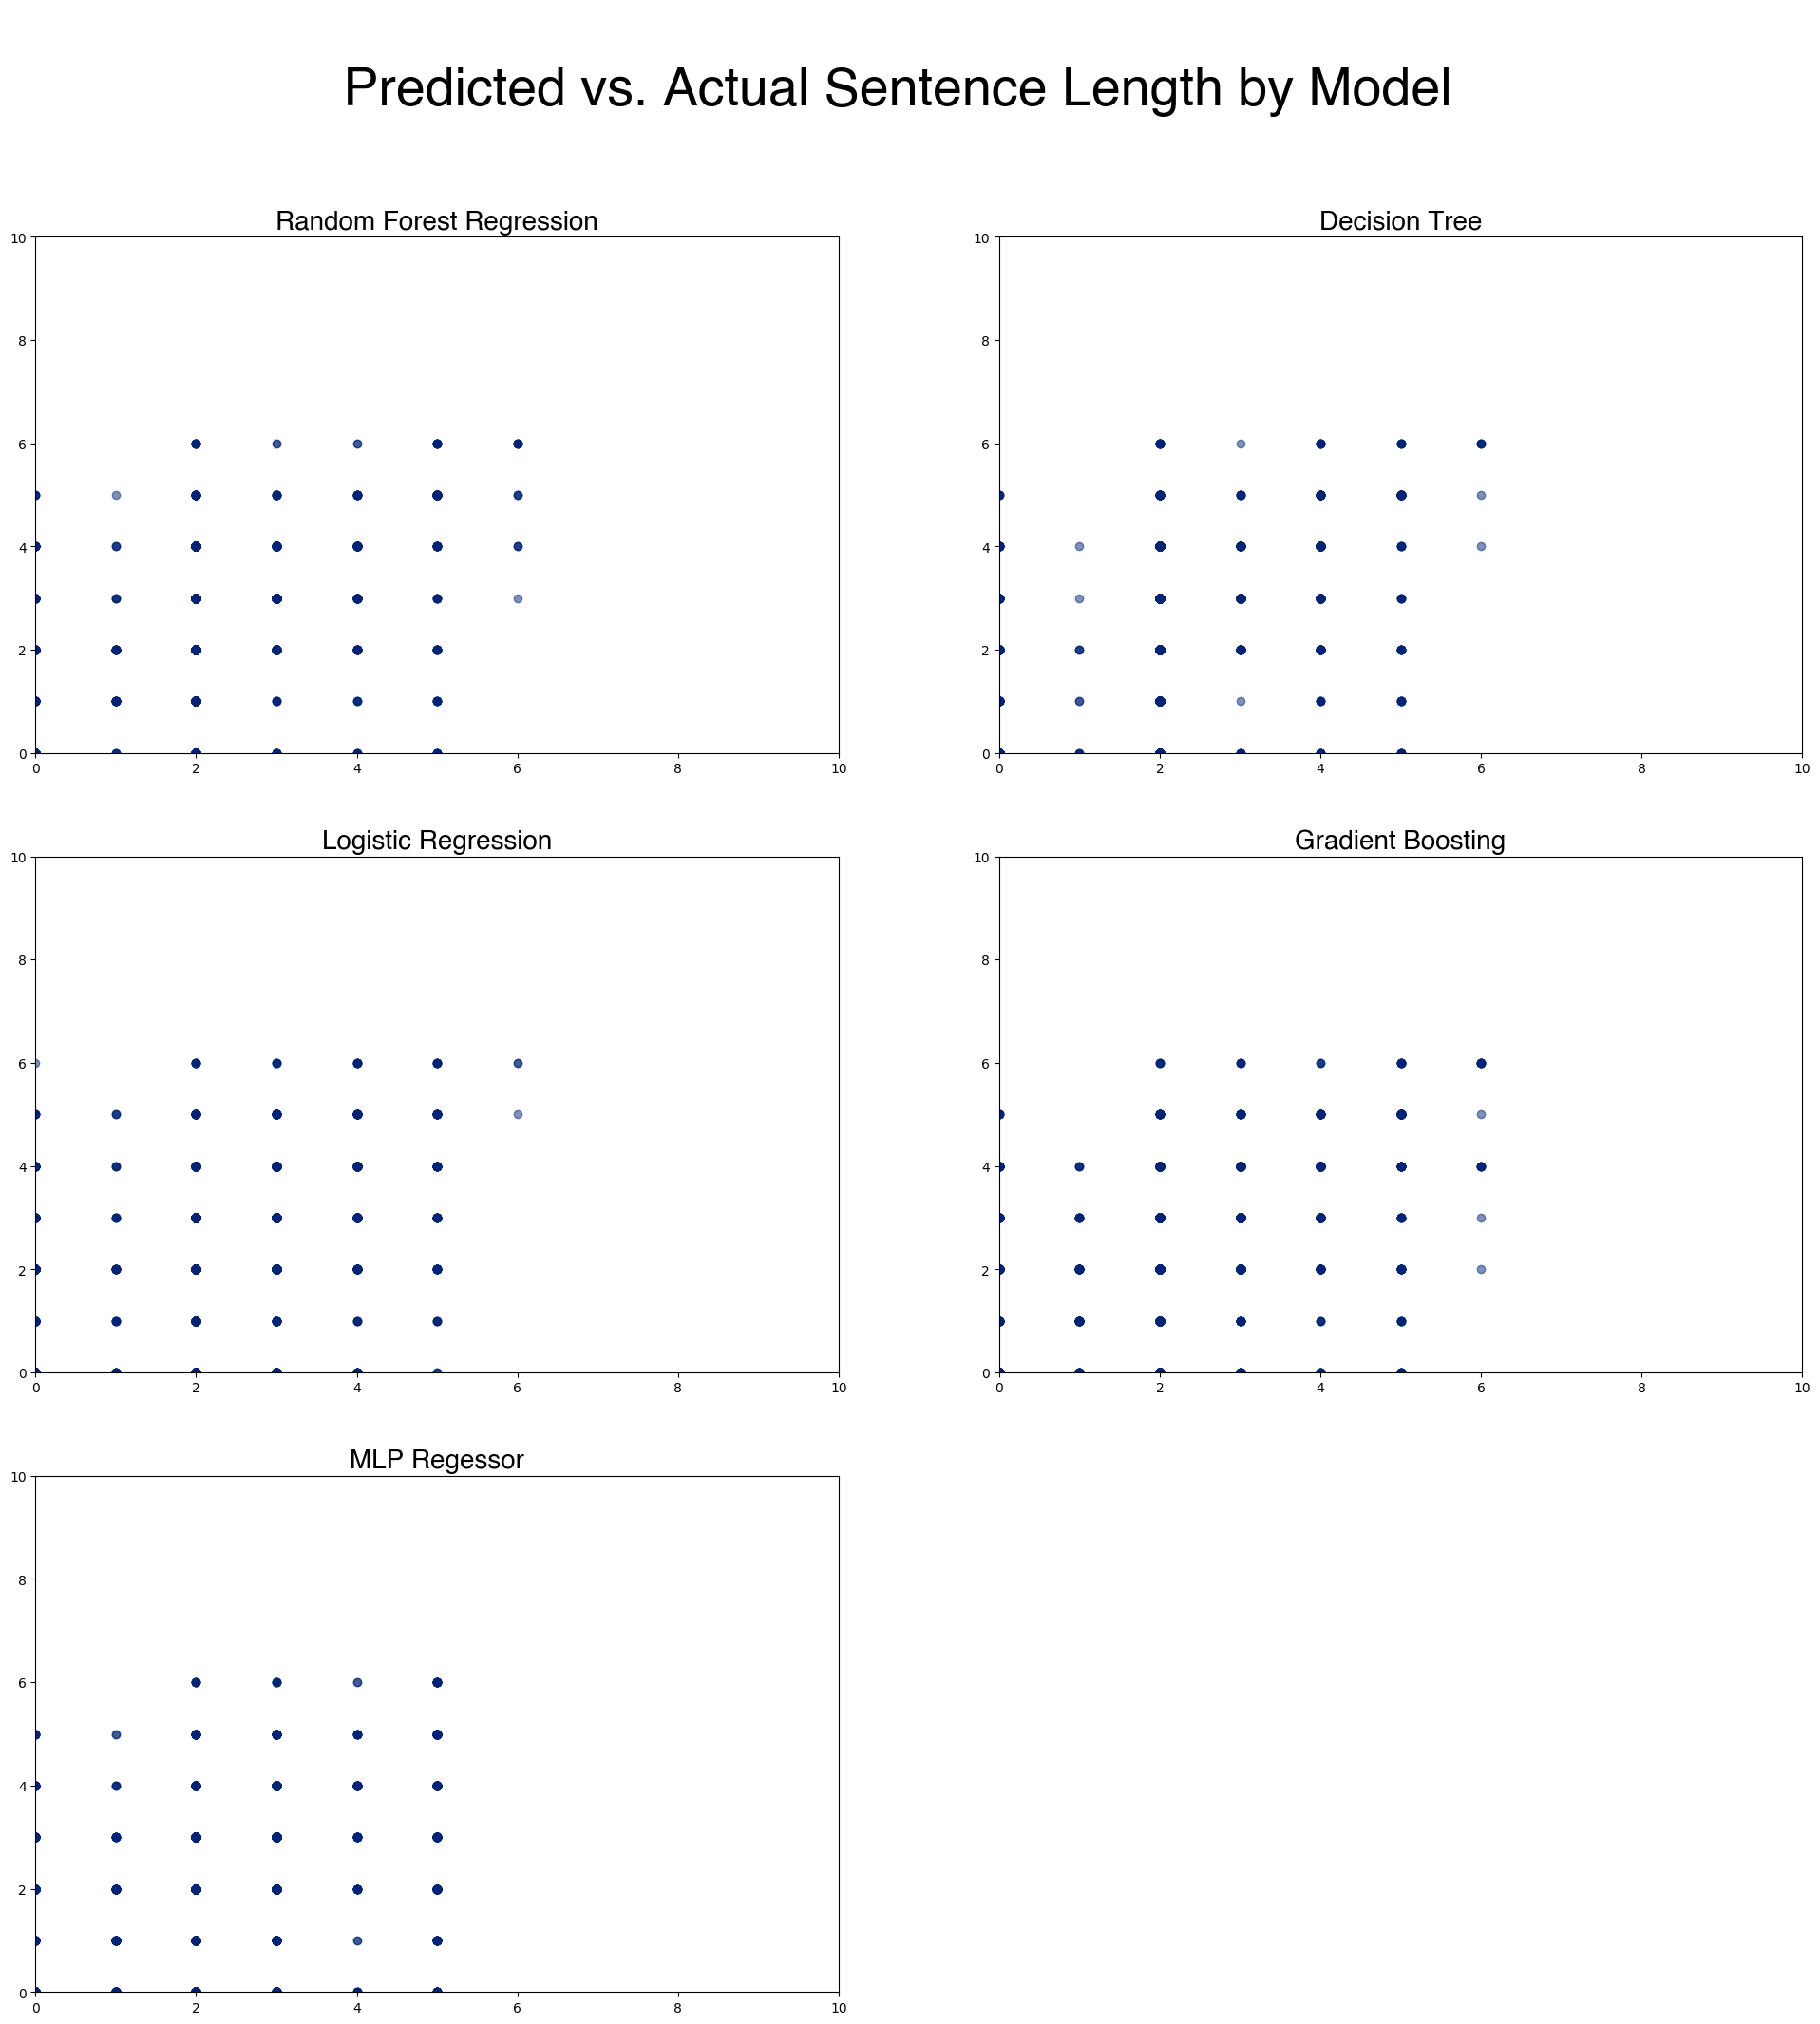

In [205]:
font = {'fontname':'helvetica'}

fig, ax = plt.subplots(3, 2, figsize=(24,24))
plt.setp(ax, xlim=(0, 10), ylim=(0, 10))

plt.subplot(3, 2, 1)
plt.scatter(rf_y_pred, y_test, alpha=(0.5), color='#002473')
plt.title('Random Forest Regression', **font, size=20)

plt.subplot(3, 2, 2)
plt.scatter(dt_y_pred, y_test, alpha=(0.5), color='#002473')
plt.title('Decision Tree', **font, size=20)

plt.subplot(3, 2, 3)
plt.scatter(lr_y_pred, y_test, alpha=(0.5), color='#002473')
plt.title('Logistic Regression', **font, size=20)

plt.subplot(3, 2, 4)
plt.scatter(gb_y_pred, y_test, alpha=(0.5), color='#002473')
plt.title('Gradient Boosting', **font, size=20)

plt.subplot(3, 2, 5)
plt.scatter(mlp_y_pred, y_test, alpha=(0.5), color='#002473')
plt.title('MLP Regessor', **font, size=20)

fig.delaxes(ax[2,1])

plt.suptitle('\n Predicted vs. Actual Sentence Length by Model', **font, fontsize=40)
plt.savefig('Results/MAEbyModel.png', dpi=100, bbox_inches='tight')

plt.show()

{'randomForest': '0.8443333333333334', 'decisionTree': '0.8516666666666667', 'logisticClassifier': '0.9556666666666667', 'gradientBoosting': '0.8516666666666667', 'mlp': '1.0106666666666666'}


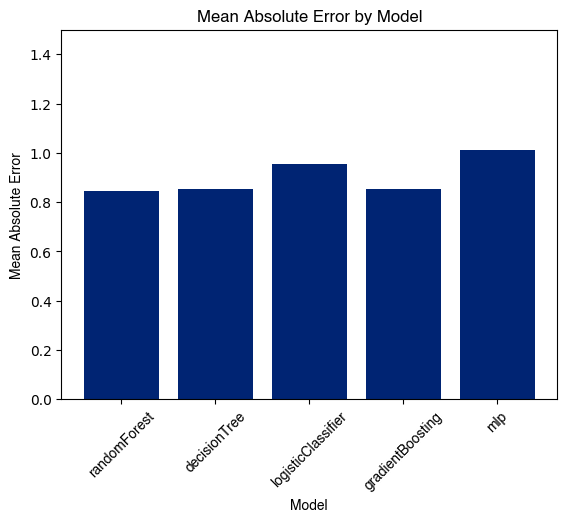

In [207]:
# plot MAE by model
print(model_metrics)
plt.bar(model_metrics.keys(), [float(value) for value in model_metrics.values()], color='#002473')
plt.xlabel('Model', **font)
plt.xticks(rotation=45, **font)
plt.ylim(0, 1.5)
plt.ylabel('Mean Absolute Error', **font)

plt.title('Mean Absolute Error by Model', **font)
plt.savefig('Results/MAEbyModelBar.png', dpi=100, bbox_inches='tight')

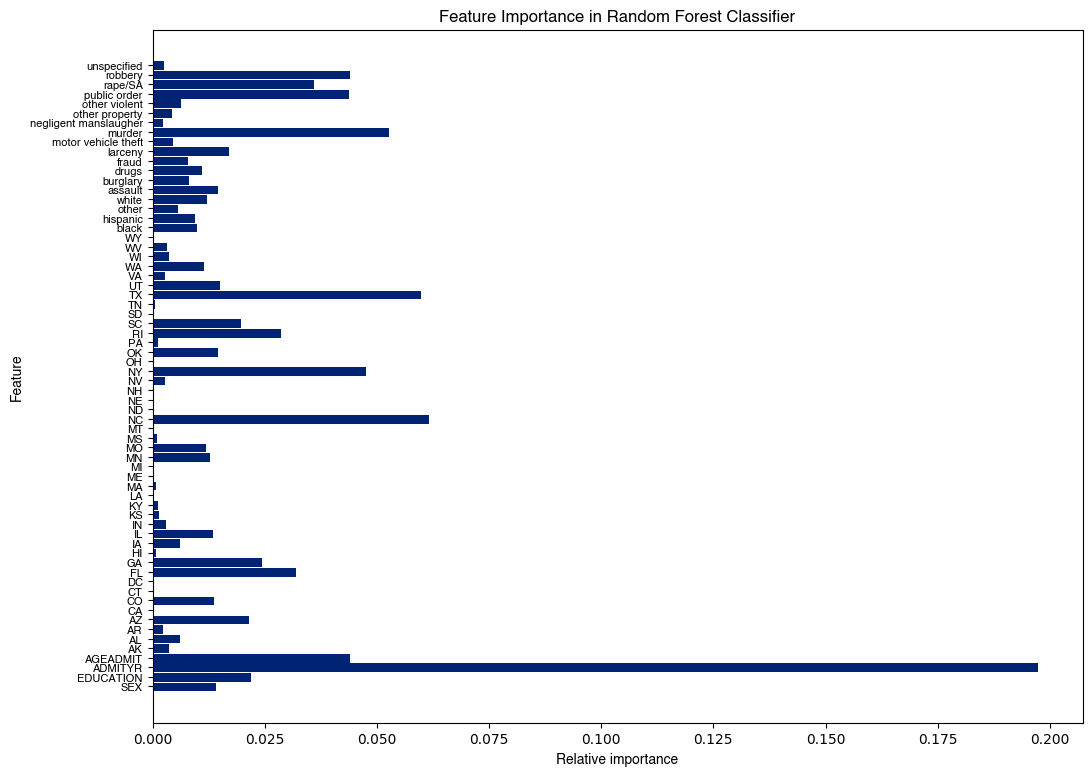

In [209]:
# plot of feature importances
y = rf.feature_importances_
fig, ax = plt.subplots() 
width = 0.9
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color='#002473')
ax.set_yticks(ind+width/15)
ax.set_yticklabels(feature_cols, minor=False, **font, size=8)
plt.title('Feature Importance in Random Forest Classifier', **font)
plt.xlabel('Relative importance', **font)
plt.ylabel('Feature', **font)
fig.set_size_inches(12, 9, forward=True)
plt.savefig('Results/feature_importance_all_cats.pngFeatureImportance.png', dpi=100, bbox_inches='tight')